In [1]:
import networkx as nx
import numpy as np
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [3]:
k = 24

In [4]:
G1 = nx.generators.lattice.grid_2d_graph(k//2, 1, periodic = True)
G2 = nx.generators.lattice.grid_2d_graph(k//2, 1, periodic = True)
G = nx.disjoint_union(G1,G2)

In [5]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23))

In [15]:
shells = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]

In [16]:
pos=nx.shell_layout(G,shells)

In [17]:
for i in range(0,12):
    G.add_edge(i,i+12)

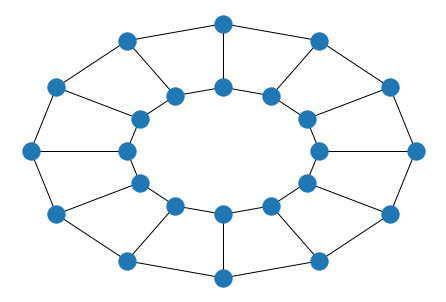

In [21]:
nx.draw(G, pos)

In [22]:
def ConcentricRing(matX, k):
    matX= np.transpose(matX)
    G1 = nx.generators.lattice.grid_2d_graph(k//2, 1, periodic = True)
    G2 = nx.generators.lattice.grid_2d_graph(k//2, 1, periodic = True)
    G = nx.disjoint_union(G1,G2)
    shells = [list(range(k//2)),list(range(k//2,k))]
    pos=nx.shell_layout(G,shells)    
    for i in range(0,k//2):
        G.add_edge(i,i+k//2)
    G = nx.convert_node_labels_to_integers(G)
    m, n = matX.shape
    smpl = rnd.choice(n, k, replace=False)
    for i, v in enumerate(G):
        G.node[v]['w'] = matX[:,smpl[i]]
    return G

def trainSOM(matX, G, tmax=1000, sigma0=1., eta0=1.):
    m, n = matX.shape
    # compute matrix of squared path length distances between neurons
    # NOTE: networkx returns a numpy matrix, but we want a numpy array
    # because this allows for easy squaring of its entries
    matD = np.asarray(nx.floyd_warshall_numpy(G))**2
    # a list of tmax random indices into the columns of matrix X
    smpl = rnd.randint(0, n, size=tmax)
    for t in range(tmax):
        # sample a point x, i.e. a column of matrix X
        vecX = matX[:,smpl[t]]
        # determine the best matching unit
        b = np.argmin([np.sum((G.node[v]['w'] - vecX)**2) for v in G])
        # update the learning rate
        eta = eta0 * (1. - t/tmax)
        # update the topological adaption rate
        sigma = sigma0 * np.exp(-t/tmax)
        # update all weights
        for i, v in enumerate(G):
            # evaluate neighborhood function
            h = np.exp(-0.5 * matD[b,i] / sigma**2)
            G.node[v]['w'] += eta * h * (vecX - G.node[v]['w'])
    return G

In [40]:
# CONCENTRIC CIRCLES
matX = np.loadtxt('C:/Users/rohil/Downloads/Uni Bonn/SoSe 2020/GAME AI/Practical Problems/q3dm1-path2.csv', delimiter=',')
#matX = matX.T
k=24
SOM2 = ConcentricRing(matX, k)
matX = matX.T
SOM2 = trainSOM(matX, SOM2, tmax=30000)


In [41]:
matSOM = np.zeros(shape = (k,3))
for i, v in enumerate(SOM2):
    matSOM[i] = SOM2.node[v]['w']

In [42]:
graph_som = np.zeros(shape = (k,3))
for i,v in enumerate(SOM2):
    graph_som[v] = SOM2.node[v]['w']
graph_som = graph_som.T

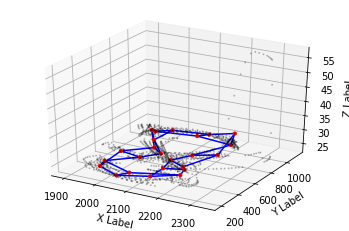

In [43]:
#matX = matX.T
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(matX[1],matX[0],matX[2], c='black', marker='o', s=1, alpha = 0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label') 

ax.scatter3D(graph_som[1],graph_som[0],graph_som[2], c='red', marker='o', s=10, alpha = 1)

for i in SOM2.edges:
    x,y = i
    ax.plot3D([graph_som[1,x],graph_som[1,y]],[graph_som[0,x],graph_som[0,y]],[graph_som[2,x],graph_som[2,y]],"blue")

In [44]:
matSOM = matSOM.T
print(matX.shape[1])
print(matSOM.shape[1])
E = 0
for i in range(matX.shape[1]):
    E += min([np.sum((matX[:,i] - matSOM[:,j])**2) for j in range(matSOM.shape[1])])
E/matX.shape[1]

1288
24


1870.618719131733